# Thuật toán PLA
1. Chọn ngẫu nhiên một vector hệ số `w` với các phần tử gần 0
2. Duyệt ngẫu nhiên qua từng điểm dữ liệu $x_i$
    1. Nếu $x_i$ được phân lớp đúng, tức $sgn(w^Tx_i) = y_i$ chúng ta không cần làm gì.
    2. Nếu $x_i$ bị misclassifed, cập nhật `w` theo công thức: $$w = w + y_i.x_i$$
3. Kiểm tra xem có bao nhiêu điểm bị misclassifed. Nếu không còn điểm nào, dừng thuật toán. Nếu còn, quay lại bước 2.

\begin{eqnarray}
f_{\mathbf{w}}(\mathbf{x}) &=& w_1x_1 + \dots + w_dx_d + w_0 \newline 
&=&\mathbf{w}^T\mathbf{\bar{x}} = 0
\end{eqnarray}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

## Tạo dữ liệu

In [2]:
np.random.seed(2)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N).T
X1 = np.random.multivariate_normal(means[1], cov, N).T
X = np.concatenate((X0, X1), axis=1)
X = np.vstack((np.ones((1, 2*N)), X))
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis=1)
X.shape

(3, 20)

Ở bài này, X là ma trận cột (các điểm là cột)

In [3]:
def h(w, x): # Tính đầu ra khi biết x, w (tính dấu)
    return np.sign(np.dot(w.T, x))
def has_converged(X, y, w): # Kiểm tra là đã hội tụ hay chưa
    return np.array_equal(h(w, X), y) # so sánh nhãn sau khi test và y thực tế
def perceptron(X, y, w_init):
    w = w_init
    d, N = X.shape
    mis_points = []
    while True:
        mix_id = np.random.permutation(N) # hoán vị ngẫu nhiên từ 0 đến N-1
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(d, 1) # chính là điểm xi
            yi = y[0, mix_id[i]] # nhãn thực tế của điểm xi
            if h(w, xi)[0] != yi: # Nếu tính toán ra thực tế mà không giốn thực tế -> Điểm lỗi
                mis_points.append(mix_id[i])
                w = w + yi*xi # cập nhật lại w
        if has_converged(X, y, w):
            break
    return (w, mis_points)

In [4]:
d = X.shape[0]
w_init = np.random.randn(d, 1) # tạo ra mảng dx1 theo phân phối chuẩn kích thước bằng kích thước xi
(w, m) = perceptron(X, y, w_init)
print(w, len(m))

[[ 3.6864918 ]
 [-4.08776229]
 [ 4.1502239 ]] 18


$$w_1.x_1 + w_2.x_2 + w_0 = 0$$
$$if (w_1 \neq 0):
x_1 = -\frac{w_2}{w_1}.x_2 - \frac{w_0}{w_1}$$
$$else: x_2 = -\frac{w_0}{w_2}$$

3.686491803006591 -4.087762294372146 4.1502238954659765


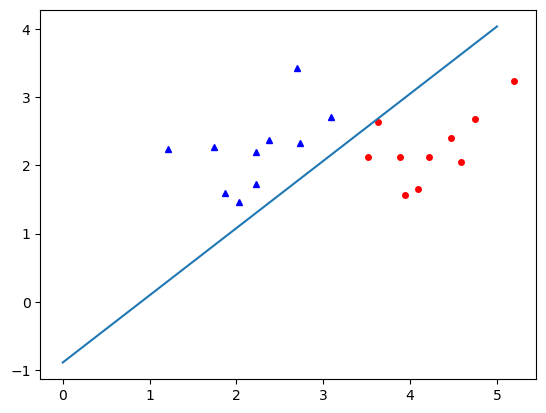

In [5]:
# Hiển thị
def PLA_display(w):
    plt.plot(X0.T[:, 0], X0.T[:, 1], 'b^', markersize=4)
    plt.plot(X1.T[:, 0], X1.T[:, 1], 'ro', markersize=4)
    w_0, w_1, w_2 = w[0][0], w[1][0], w[2][0]
    print(w_0, w_1, w_2)
    if w_2 != 0: 
        x_11, x_12 = 0, 5
        plt.plot([x_11, x_12],[-(w_1*x_11 + w_0)/w_2, -(w_1*x_12 + w_0)/w_2])
    else:
        plt.plot([-w_0/w_1, -w_0/w_1], [x_11, x_12])
    plt.show()
PLA_display(w)

# Dự đoán điểm thêm vào

In [6]:
A = np.array([1, 2, 2]).T
if np.sign(np.dot(w.T, A)) == 1:
    print('blue')
else:
    print('red')

blue
